# Interactive influence lines #

![figuur 1](data/data_interactive_influence_lines/Structure.gif)

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt

In [2]:
EI, x = sp.symbols('EI, x',real=True)

In [3]:
Av, Bv, Cv = sp.symbols('Av, Bv, Cv',real=True)
a, b, L1, L2 = sp.symbols('a, b, L1, L2',positive=True,real=True)
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')

##  Finding influence line for M ##

In [4]:
q = Bv * sp.SingularityFunction(x,L1,-1) - Av * sp.SingularityFunction(x,0,-1) - Cv * sp.SingularityFunction(x,L1+L2,-1)
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3 - sp.SingularityFunction(x,a,0)
w = sp.integrate(phi,x)+C4

Piecewise((x/10 - 1, x > 10), (-x**3/250 + 3*x**2/25 - 11*x/10 + 3, x > 5), (x**3/250 - x/2 + 2, x > 2), (x*(x**2 + 125)/250, x > 0), (x/2, True))

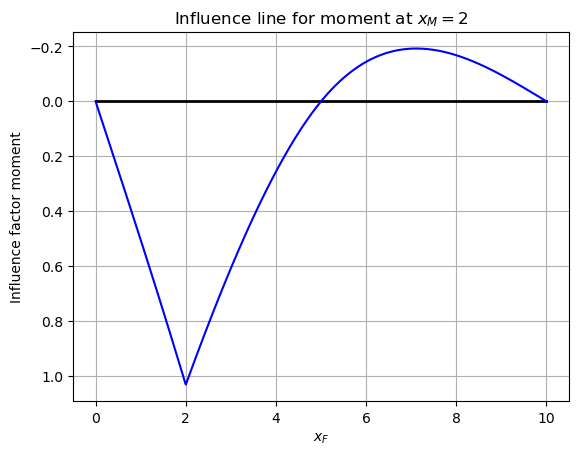

In [5]:
%matplotlib inline
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(w.subs(x,L1),0)
eq3 = sp.Eq(w.subs(x,L1+L2),0)
eq4 = sp.Eq(M.subs(x,0),0)
eq5 = sp.Eq(M.subs(x,L1+L2),0)
eq6 = sp.Eq(V.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,L1+L2+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv,Cv])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
M_inf_numpy = sp.lambdify([L1,L2,a,EI,x],w_sol.rewrite(sp.Piecewise))

x_plot = np.linspace(0,10,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_inf_numpy(L1=5,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor moment')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for moment at $x_M = 2$'
axs.set_title(title0);

## Find influence line M for all load and moment locations

In [6]:
function3d = w_sol.subs([(L1,5),(L2,5),(EI,5000)]).rewrite(sp.Piecewise).simplify()
#display(function3d)

Piecewise((a*(x - 10)/20, (x > 10) & (a < 5)), (a*(-x**3 + 30*x**2 - 275*x + 750)/500, (x > 5) & (a < 5)), (a*(x**3 - 125*x + 500)/500, (a < 5) & (a < x)), (a + x**3*(a - 5)/250 - 3*x*(a - 5)/10 - x + (a - 5)*(x - 10)**3/250, (x > 10) & (a < 5) & (a < x)), (-a*x/4 + 5*a/2 + 3*x/2 - 15, (x > 10) & (a < 10)), (a + x**3*(10 - a)/500 + x*(a - 10)/20 - x + (a - 10)*(x - 5)**3/250, (x > 5) & (a < 10) & (a < x)), (a + x**3*(10 - a)/500 + x*(a - 10)/20 - x, (a < 10) & (a < x)), (a - x, a < x), (x*(a*x**2 - 125*a + 500)/500, (x > 0) & (a < 5)), (x*(4 - a)/4, a < 5), (x**3*(10 - a)/500 + x*(a - 10)/20 + (a - 10)*(x - 5)**3/250, (x > 5) & (a < 10)), (x*(25*a + x**2*(10 - a) - 250)/500, (x > 0) & (a < 10)), (x*(a - 10)/20, a < 10), (0, True))

<IPython.core.display.Javascript object>


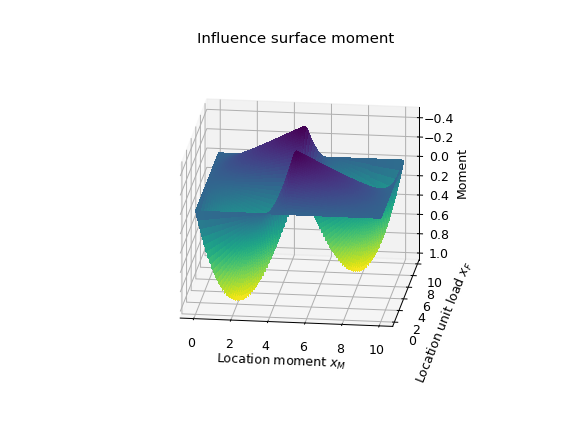

In [15]:
%matplotlib notebook

a_input = np.linspace(0,10,100) #location moment
x_input = np.linspace(0,10,100) #location unit load

A_input,X_input = np.meshgrid(a_input,x_input)
Z = M_inf_numpy(5,5,A_input,5000,X_input)

ax = plt.axes(projection='3d')
ax.plot_surface(A_input, X_input, Z, rstride=1, cstride=1,
                cmap='viridis',antialiased=False)
ax.set_title('Influence surface moment');
ax.set_xlabel('Location moment $x_M$')
ax.set_ylabel('Location unit load $x_F$')
ax.set_zlabel('Moment');
ax.invert_zaxis()
#ax.view_init(elev=0, azim=-90)
ax.set_proj_type('ortho')

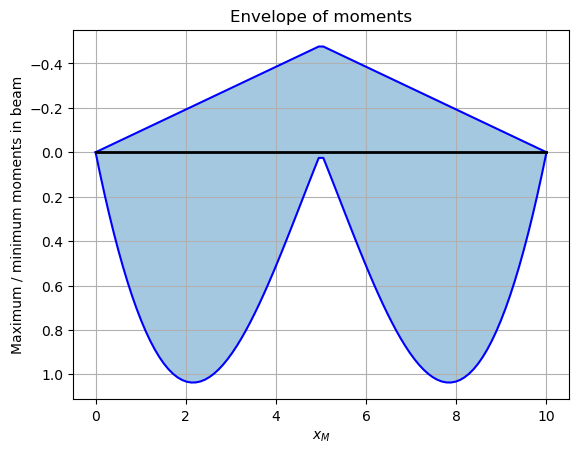

In [8]:
%matplotlib inline
Z_max = np.zeros(100)
Z_min = np.zeros(100)
for i in range(100):
    Z_max[i]=max(Z[:,i])
    Z_min[i]=min(Z[:,i])

plt.plot(x_input,Z_max,color='blue')
plt.plot(x_input,Z_min,color='blue')
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.fill_between(x_input,Z_min,Z_max,alpha=0.4)
plt.xlabel('$x_M$')
plt.ylabel('Maximum / minimum moments in beam')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Envelope of moments'
axs.set_title(title0);

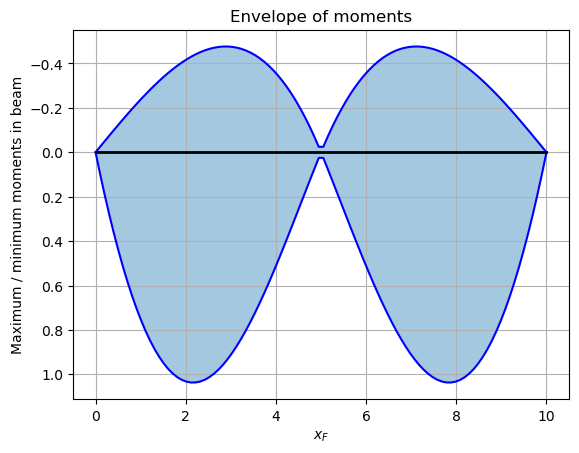

In [9]:
%matplotlib inline
Z_max = np.zeros(100)
Z_min = np.zeros(100)
for i in range(100):
    Z_max[i]=max(Z[i,:])
    Z_min[i]=min(Z[i,:])

plt.plot(x_input,Z_max,color='blue')
plt.plot(x_input,Z_min,color='blue')
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.fill_between(x_input,Z_min,Z_max,alpha=0.4)
plt.xlabel('$x_F$')
plt.ylabel('Maximum / minimum moments in beam')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Envelope of moments'
axs.set_title(title0);

## Find influence line V ##

Piecewise(((10 - x)/20, x > 10), ((x**3 - 30*x**2 + 275*x - 750)/500, x > 5), (-x**3/500 + x/4 - 1, x > 2), (x*(125 - x**2)/500, x > 0), (x/4, True))

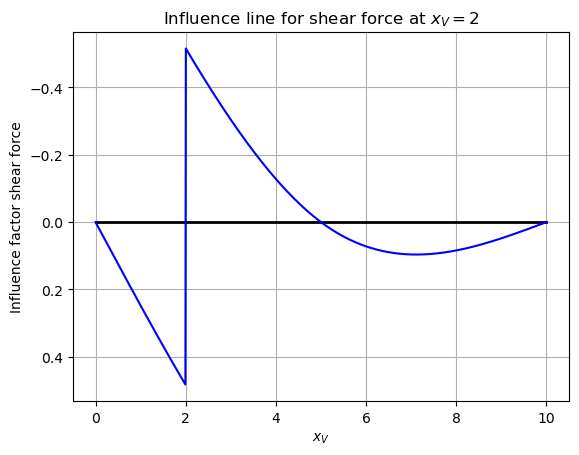

In [10]:
%matplotlib inline
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3
w = sp.integrate(phi,x)+C4 - sp.SingularityFunction(x,a,0)
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(w.subs(x,L1),0)
eq3 = sp.Eq(w.subs(x,L1+L2),0)
eq4 = sp.Eq(M.subs(x,0),0)
eq5 = sp.Eq(M.subs(x,L1+L2),0)
eq6 = sp.Eq(V.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,L1+L2+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv,Cv])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
V_inf_numpy = sp.lambdify([L1,L2,a,EI,x],w_sol.rewrite(sp.Piecewise))

x_plot = np.linspace(0,10,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,V_inf_numpy(L1=5,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x_V$')
plt.ylabel('Influence factor shear force')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for shear force at $x_V = 2$'
axs.set_title(title0);

## Find influence line V for all load and shear force locations ##

In [11]:
function3d = w_sol.subs([(L1,5),(L2,5),(EI,5000)]).rewrite(sp.Piecewise).simplify()
display(function3d)

Piecewise(((10 - x)/20, (x > 10) & (a < 5)), ((x**3 - 30*x**2 + 275*x - 750)/500, (x > 5) & (a < 5)), (-x**3/500 + x/4 - 1, (a < 5) & (a < x)), ((x - 10)/4, (x > 10) & (a < 10)), ((-x**3 + 30*x**2 - 175*x - 250)/500, (x > 5) & (a < 10) & (a < x)), (x**3/500 - x/20 - 1, (a < 10) & (a < x)), (-x**3/250 + 3*x/10 - (x - 10)**3/250 - 1, (x > 10) & (a < 5) & (a < x)), (-1, a < x), (x*(125 - x**2)/500, (x > 0) & (a < 5)), (x/4, a < 5), ((x**3 - 25*x - 2*(x - 5)**3)/500, (x > 5) & (a < 10)), (x*(x**2 - 25)/500, (x > 0) & (a < 10)), (-x/20, a < 10), (0, True))

<IPython.core.display.Javascript object>


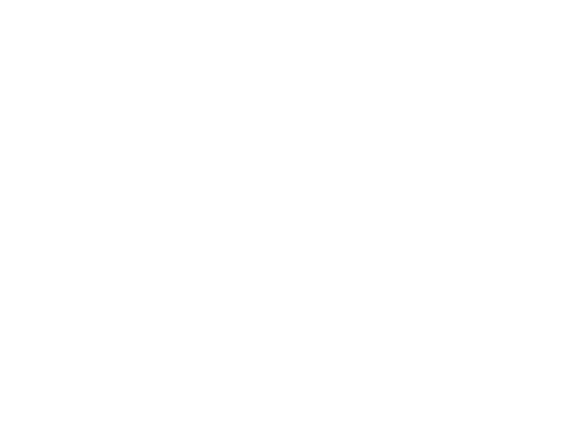

In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt

a_input = np.linspace(0,10,100) #location shear force
x_input = np.linspace(0,10,100) #location unit load

A_input,X_input = np.meshgrid(a_input,x_input)
Z = V_inf_numpy(5,5,A_input,5000,X_input)

ax = plt.axes(projection='3d')
ax.plot_surface(A_input, X_input, Z, rstride=1, cstride=1,
                cmap='viridis',antialiased=False)
ax.set_title('Influence surface shear force');
ax.set_xlabel('Location shear force $x_V$')
ax.set_ylabel('Location unit load $x_F$')
ax.set_zlabel('Shear force');
ax.invert_zaxis()
#ax.view_init(elev=0, azim=-90)
ax.set_proj_type('ortho')

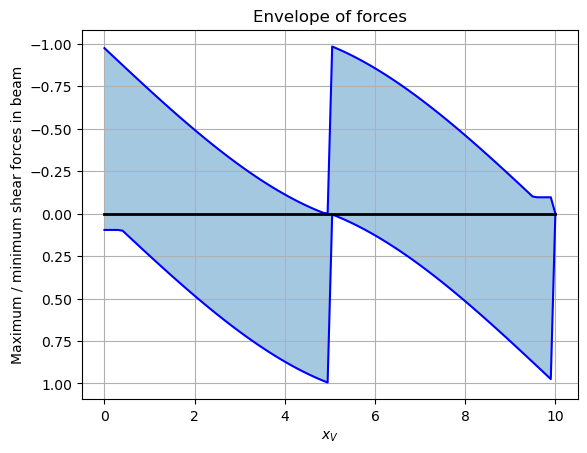

In [13]:
%matplotlib inline
Z_max = np.zeros(100)
Z_min = np.zeros(100)
for i in range(100):
    Z_max[i]=max(Z[:,i])
    Z_min[i]=min(Z[:,i])

plt.plot(x_input,Z_max,color='blue')
plt.plot(x_input,Z_min,color='blue')
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.fill_between(x_input,Z_min,Z_max,alpha=0.4)
plt.xlabel('$x_V$')
plt.ylabel('Maximum / minimum shear forces in beam')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Envelope of forces'
axs.set_title(title0);

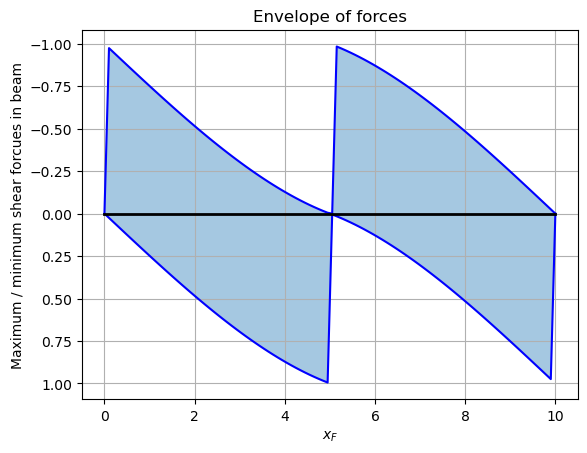

In [14]:
%matplotlib inline
Z_max = np.zeros(100)
Z_min = np.zeros(100)
for i in range(100):
    Z_max[i]=max(Z[i,:])
    Z_min[i]=min(Z[i,:])

plt.plot(x_input,Z_max,color='blue')
plt.plot(x_input,Z_min,color='blue')
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.fill_between(x_input,Z_min,Z_max,alpha=0.4)
plt.xlabel('$x_F$')
plt.ylabel('Maximum / minimum shear forcues in beam')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Envelope of forces'
axs.set_title(title0);